---
# Unsupervised Learning - Principal Component Analysis:
---

## Wine Dataset Analysis:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


---
### Null Values Check:

In [3]:
# Checking dataset if there are any null values present
df.isnull().values.any()

False

##### There are no null or missing values in the above dataset.
---

In [4]:
# Correlation Matrix
df.corr()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
class_label,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


## Outlier Detection:

In [5]:
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Dropping Categorical Features for Outlier Detection
df1 = df.drop(['class_label', 'class_name'], axis=1)
df1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
cols = df1.columns
cols = list(cols)
cols

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280',
 'proline']

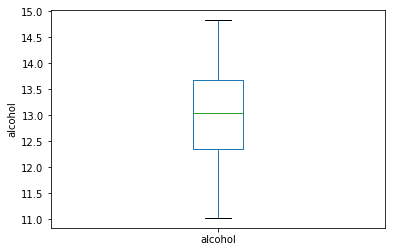

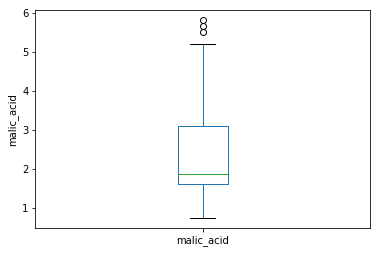

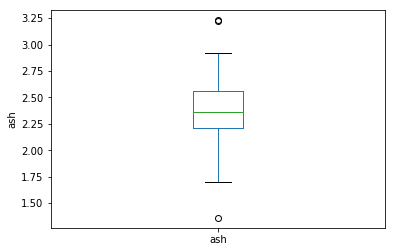

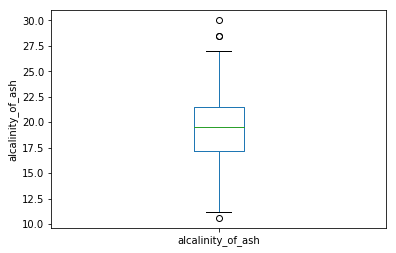

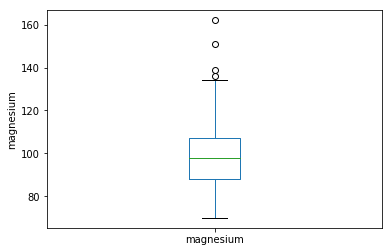

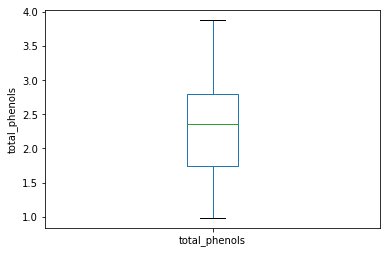

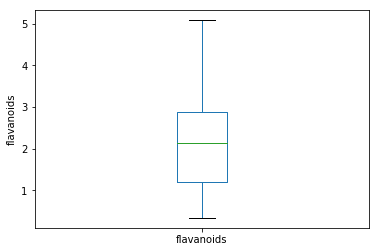

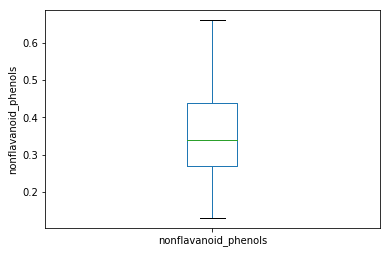

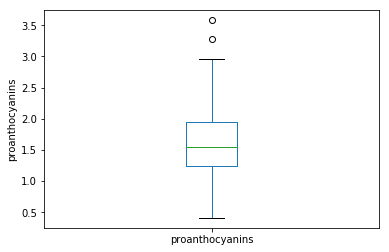

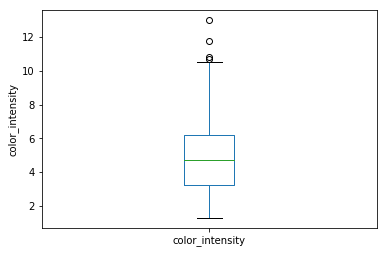

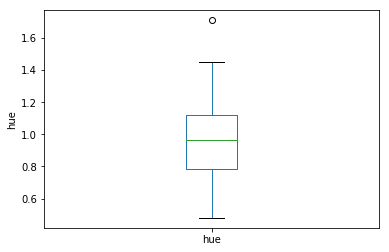

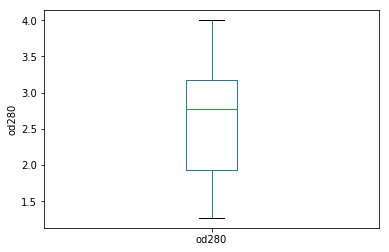

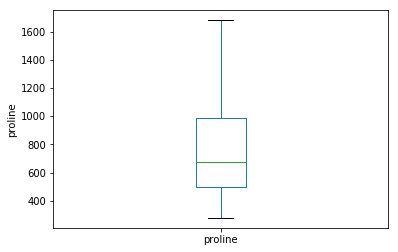

In [8]:
# Plotting box plots for all columns in dataset to gain further insights on dataset columns especially with respect to outliers
for column in cols:
    df1[column].plot.box()
    plt.ylabel(column)
    plt.show()

### From the above box-plots we can see that columns such as malic_acid, magnesium color_intensity all have many outliers (high outliers).

### Outlier Detection for feature malic_acid:

In [9]:
df1['malic_acid'].head()

0    1.71
1    1.78
2    2.36
3    1.95
4    2.59
Name: malic_acid, dtype: float64

In [10]:
# IQR 


Q1 = df1['malic_acid'].quantile(0.25)
Q3 = df1['malic_acid'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

1.4799999999999998


In [11]:
# Below are the outlier rows of column 'record_min_temp_year'

outliers_malic = df1['malic_acid'][(df1['malic_acid'] < (Q1 - 1.5 * IQR)) |(df1['malic_acid'] > (Q3 + 1.5 * IQR))]



In [12]:
outliers_malic.count()

3

### There are 3 high outliers for malic_acid
---

### Outlier detection for color_intensity

In [13]:
df1['color_intensity'].head()

0    5.64
1    4.38
2    5.68
3    7.80
4    4.32
Name: color_intensity, dtype: float64

In [14]:
# IQR 


Q1 = df1['color_intensity'].quantile(0.25)
Q3 = df1['color_intensity'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

2.9800000000000004


In [15]:
# Below are the outlier rows of column 'record_min_temp_year'

outliers_color = df1['color_intensity'][(df1['color_intensity'] < (Q1 - 1.5 * IQR)) |(df1['color_intensity'] > (Q3 + 1.5 * IQR))]



In [16]:
outliers_color.count()

4

### There are 4 outliers for color_intensity
---

## Data Standardization using StandardScalar:

In [17]:
import sklearn
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
features = df.drop(['class_label', 'class_name'], axis=1)
target = df['class_name'] # Target variable we are going to predict

In [19]:
# Normalizing our data since we are performing linear regression and it's cost parameter is a distance metric where normalizing data is imperative.
from sklearn.preprocessing import StandardScaler

features_transformed = StandardScaler().fit_transform(features)
features_transformed = pd.DataFrame(features_transformed)
features_transformed.head()


/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [20]:
# Adding column names to featured_transformed
features_transformed.columns = df1.columns
features_transformed.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### All the features are now on the same scale.
---

## Principal Component Analysis:

---
### PCA from scratch:

In [21]:
# Step 1: Making a copy of features that have already been standardized

features_standardized = features_transformed

In [22]:
# Step 2: Calculate covariance matrix(S) = X.T * X

covar_matrix = np.matmul(features_standardized.T, features_standardized)
covar_matrix

array([[178.        ,  16.80265548,  37.65493816, -55.22185437,
         48.20208421,  51.45999982,  42.15305717, -27.75544507,
         24.33222829,  97.25282672, -12.77100112,  12.87708736,
        114.58216662],
       [ 16.80265548, 178.        ,  29.20009362,  51.3530717 ,
         -9.7143671 , -59.65972549, -73.1591726 ,  52.14992976,
        -39.29282125,  44.31939125, -99.91063258, -65.63045624,
        -34.1778805 ],
       [ 37.65493816,  29.20009362, 178.        ,  78.91935921,
         51.01243104,  22.9583577 ,  20.48375566,  33.14901944,
          1.71804446,  46.08193216, -13.29070625,   0.69619905,
         39.80547494],
       [-55.22185437,  51.3530717 ,  78.91935921, 178.        ,
        -14.83328977, -57.15817048, -62.5438351 ,  64.4220659 ,
        -35.12417676,   3.33429261, -48.76402964, -49.2648017 ,
        -78.42625377],
       [ 48.20208421,  -9.7143671 ,  51.01243104, -14.83328977,
        178.        ,  38.16341977,  34.84951103, -45.62034071,
         42.

In [24]:
# Shape of covariance matrix

covar_matrix.shape

(13, 13)

In [47]:
# Step 3: Finding eigen values and eigen vectors using eigh function from scipy
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals=(1, 12)) 

In [63]:
vectors

array([[-0.26628645, -0.22591696,  0.21160473,  0.50861912,  0.39613926,
         0.05639636,  0.21353865,  0.26566365, -0.0178563 , -0.20738262,
        -0.48365155, -0.1443294 ],
       [ 0.12169604,  0.07648554, -0.30907994, -0.07528304,  0.06582674,
        -0.42052391,  0.53681385, -0.03521363,  0.53689028,  0.08901289,
        -0.22493093,  0.24518758],
       [-0.04962237, -0.49869142, -0.02712539, -0.30769445, -0.17026002,
         0.14917061,  0.15447466,  0.14302547, -0.21417556,  0.6262239 ,
        -0.31606881,  0.00205106],
       [-0.05574287,  0.47931378,  0.05279942,  0.20044931,  0.42797018,
         0.28696914, -0.10082451, -0.06610294,  0.06085941,  0.61208035,
         0.0105905 ,  0.23932041],
       [ 0.06222011,  0.07128891,  0.06787022,  0.27140257, -0.15636143,
        -0.3228833 ,  0.03814394, -0.72704851, -0.35179658,  0.13075693,
        -0.299634  , -0.14199204],
       [-0.30388245,  0.30434119, -0.32013135,  0.28603452, -0.40593409,
         0.02792498, -

In [58]:
explained_variance = values[::-1] # reversing the list as eigh arranges eigen values in ascending order
explained_variance

array([837.64134503, 444.46132455, 257.40081061, 163.57735843,
       151.87461575, 114.21495161,  98.08303953,  62.03253067,
        51.42062979,  44.66064183,  40.19037787,  30.0411018 ])

In [57]:
total = sum(values)

In [59]:
explained_variance_ratio = explained_variance / total
explained_variance_ratio

array([0.36489014, 0.19361455, 0.11212796, 0.07125695, 0.06615904,
       0.04975388, 0.04272656, 0.02702238, 0.02239966, 0.0194549 ,
       0.01750758, 0.01308639])

In [60]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.36489014, 0.5585047 , 0.67063266, 0.74188961, 0.80804865,
       0.85780253, 0.9005291 , 0.92755147, 0.94995113, 0.96940603,
       0.98691361, 1.        ])

### From above cumulative_explained_variance we can see that 92% of data is explained using top 8 of the 13 transformed features.

### Therefore top 8 vectors can be used to calculated new_coordinates

In [73]:
from scipy.linalg import eigh

values_selected, vectors_selected = eigh(covar_matrix, eigvals=(5, 12)) 

In [74]:
vectors_selected.T

array([[ 0.39613926,  0.06582674, -0.17026002,  0.42797018, -0.15636143,
        -0.40593409, -0.18724536, -0.23328465,  0.36822675, -0.03379692,
         0.43662362, -0.07810789,  0.12002267],
       [ 0.05639636, -0.42052391,  0.14917061,  0.28696914, -0.3228833 ,
         0.02792498,  0.06068521, -0.59544729, -0.37213935,  0.22771214,
        -0.23207564,  0.0447637 , -0.0768045 ],
       [ 0.21353865,  0.53681385,  0.15447466, -0.10082451,  0.03814394,
        -0.0841223 , -0.01892002, -0.25859401, -0.53379539, -0.41864414,
         0.10598274,  0.26585107,  0.11972557],
       [ 0.26566365, -0.03521363,  0.14302547, -0.06610294, -0.72704851,
         0.14931841,  0.10902584,  0.50070298, -0.13685982,  0.07643678,
         0.17361452,  0.10116099,  0.1578688 ],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.20738262,  0.089012

In [75]:
# Applying transform to vectors

vectors_selected = vectors_selected.T

In [76]:
new_coordinates = np.matmul(vectors_selected, features_standardized.T)
new_coordinates

array([[-0.06513909, -1.02441595,  0.34421613, ..., -0.0470238 ,
        -0.39082877,  0.29291373],
       [-0.59642655, -0.05377561, -0.42420545, ..., -0.67923541,
        -0.63397527, -0.00574126],
       [ 0.22388013,  0.92712024, -0.54927605, ..., -0.27306792,
        -1.17878298, -0.29609218],
       ...,
       [-0.16573904, -2.02645737,  0.98281867, ..., -0.94094188,
        -0.5506962 ,  1.01391366],
       [-1.44346263,  0.33339289, -1.0311513 , ..., -2.76089913,
        -2.29734668, -2.76891957],
       [-3.31675081, -2.20946492, -2.51674015, ...,  2.67783946,
         2.38701709,  3.20875816]])

In [77]:
features_transformed = pd.DataFrame(new_coordinates)
features_transformed

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,-0.065139,-1.024416,0.344216,-0.643593,-0.416700,-0.394893,0.371934,-0.232979,0.499578,-0.150580,...,0.926074,0.294005,-0.582906,-0.676087,0.296516,0.146097,0.552427,-0.047024,-0.390829,0.292914
1,-0.596427,-0.053776,-0.424205,0.383337,-0.444074,-0.401654,-0.052891,-0.032376,-0.125285,0.874352,...,0.753322,0.930473,0.291849,1.025640,0.829199,-0.958416,-0.146894,-0.679235,-0.633975,-0.005741
2,0.223880,0.927120,-0.549276,-0.114431,0.406520,-0.123431,0.620121,1.439806,0.129181,-0.163392,...,-0.629568,0.983645,0.395378,-0.857959,-0.680855,1.108788,0.026465,-0.273068,-1.178783,-0.296092
3,-0.693043,0.257655,0.251033,0.311842,-0.298458,0.632019,1.027762,-0.076903,0.892257,0.468553,...,-0.359874,-1.127997,-0.609095,0.486112,0.701210,0.574164,-0.255063,-1.271355,-0.813955,0.895193
4,-0.215631,-0.291358,0.724902,0.567983,-0.409766,-0.515637,-0.065831,-1.192608,0.056270,0.349382,...,-0.389593,0.588502,-0.217065,-0.125176,0.018025,1.058527,0.349496,0.312035,-0.688285,0.596903
5,-0.165739,-2.026457,0.982819,-0.176192,2.026688,-0.629396,-0.977095,0.146282,-1.770969,-0.984247,...,0.763783,1.418044,-0.847129,-1.339420,-0.918781,-0.342570,0.207581,-0.940942,-0.550696,1.013914
6,-1.443463,0.333393,-1.031151,-2.756372,-0.869831,-2.122401,-1.174850,-1.608963,-0.918071,-0.789438,...,-2.077537,-2.588667,0.251249,-0.847748,-2.193798,-2.216289,-1.757229,-2.760899,-2.297347,-2.768920
7,-3.316751,-2.209465,-2.516740,-3.757066,-1.008908,-3.050254,-2.449090,-2.059437,-2.510874,-2.753628,...,2.181413,2.380928,3.211617,3.677919,2.465556,3.370524,2.601956,2.677839,2.387017,3.208758


In [78]:
# Applying Transpose of new_coordinates
features_transformed = features_transformed.T
features_transformed.head()

,0,1,2,3,4,5,6,7
0,-0.065139,-0.596427,0.223880,-0.693043,-0.215631,-0.165739,-1.443463,-3.316751
1,-1.024416,-0.053776,0.927120,0.257655,-0.291358,-2.026457,0.333393,-2.209465
2,0.344216,-0.424205,-0.549276,0.251033,0.724902,0.982819,-1.031151,-2.516740
3,-0.643593,0.383337,-0.114431,0.311842,0.567983,-0.176192,-2.756372,-3.757066
4,-0.416700,-0.444074,0.406520,-0.298458,-0.409766,2.026688,-0.869831,-1.008908


In [79]:
from sklearn.model_selection import train_test_split
# Split your data into training and testing (80% / 20%)
x_train, x_test, y_train, y_test = train_test_split(
    features_transformed,
    target,
    random_state=42,
    test_size=0.20, shuffle=True
)

In [80]:
from sklearn.linear_model import LogisticRegression
pca_scratch = LogisticRegression()
pca_scratch.fit(x_train, y_train)
y_predict = pca_scratch.predict(x_test)
y_predict

/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['Barolo', 'Barolo', 'Barbera', 'Barolo', 'Grignolino', 'Barolo',
       'Grignolino', 'Barbera', 'Grignolino', 'Barbera', 'Barolo',
       'Barbera', 'Barolo', 'Grignolino', 'Barolo', 'Grignolino',
       'Grignolino', 'Grignolino', 'Barolo', 'Grignolino', 'Barolo',
       'Grignolino', 'Grignolino', 'Barbera', 'Barbera', 'Barbera',
       'Grignolino', 'Grignolino', 'Grignolino', 'Barolo', 'Barolo',
       'Grignolino', 'Barbera', 'Barolo', 'Barolo', 'Barolo'],
      dtype=object)

In [81]:
y_predict_proba = pca_scratch.predict_proba(x_test)[:, 1]
y_predict_proba

array([9.58297286e-01, 8.06739752e-01, 1.02510225e-02, 9.70018346e-01,
       1.10033794e-02, 9.13362694e-01, 4.82104990e-03, 1.67187460e-02,
       4.28010466e-02, 3.08518874e-02, 6.91545014e-01, 5.21314025e-03,
       8.88387978e-01, 4.59949824e-03, 9.64680323e-01, 7.57877741e-03,
       8.45701398e-04, 1.48120193e-03, 9.78452366e-01, 5.73851597e-03,
       9.76418388e-01, 2.53191695e-01, 2.68949038e-02, 4.66328212e-02,
       1.15976471e-03, 7.24056074e-03, 1.71329200e-03, 9.56721481e-02,
       1.21092657e-03, 9.55923611e-01, 9.49712136e-01, 6.30694159e-04,
       6.28509075e-03, 9.69394172e-01, 9.76800603e-01, 9.82750718e-01])

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Classification report:\n\n', classification_report(y_test, y_predict))
print('Training set score: {:.2f}%'.format(pca_scratch.score(x_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(pca_scratch.score(x_test, y_test) * 100))

Accuracy: 100.00%
Classification report:

               precision    recall  f1-score   support

     Barbera       1.00      1.00      1.00         8
      Barolo       1.00      1.00      1.00        14
  Grignolino       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Training set score: 98.59%
Testing set score: 100.00%


---
### PCA using Scikit-Learn:
### Using n_components = 13, 8, 5

In [50]:
from sklearn.decomposition import PCA
# PCA using 13 features
pca13 = PCA()
features_pca13 = pca13.fit_transform(features_transformed)
features_pca13

array([[ 3.31675081, -1.44346263, -0.16573904, ..., -0.22388013,
         0.59642655,  0.06513909],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.92712024,
         0.05377561,  1.02441595],
       [ 2.51674015, -1.0311513 ,  0.98281867, ...,  0.54927605,
         0.42420545, -0.34421613],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  0.27306792,
         0.67923541,  0.0470238 ],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  1.17878298,
         0.63397527,  0.39082877],
       [-3.20875816, -2.76891957,  1.01391366, ...,  0.29609218,
         0.00574126, -0.29291373]])

In [52]:
pca13.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627])

In [22]:
pca8 = PCA(n_components=8)
features_pca8 = pca8.fit_transform(features_transformed)
features_pca8

array([[ 3.31675081, -1.44346263, -0.16573904, ..., -0.22388013,
         0.59642655,  0.06513909],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.92712024,
         0.05377561,  1.02441595],
       [ 2.51674015, -1.0311513 ,  0.98281867, ...,  0.54927605,
         0.42420545, -0.34421613],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  0.27306792,
         0.67923541,  0.0470238 ],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  1.17878298,
         0.63397527,  0.39082877],
       [-3.20875816, -2.76891957,  1.01391366, ...,  0.29609218,
         0.00574126, -0.29291373]])

In [23]:
pca5 = PCA(n_components=5)
features_pca5 = pca8.fit_transform(features_transformed)
features_pca5

array([[ 3.31675081, -1.44346263, -0.16573904, ..., -0.22388013,
         0.59642655,  0.06513909],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.92712024,
         0.05377561,  1.02441595],
       [ 2.51674015, -1.0311513 ,  0.98281867, ...,  0.54927605,
         0.42420545, -0.34421613],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  0.27306792,
         0.67923541,  0.0470238 ],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  1.17878298,
         0.63397527,  0.39082877],
       [-3.20875816, -2.76891957,  1.01391366, ...,  0.29609218,
         0.00574126, -0.29291373]])

In [44]:
lambda_list = list(pca13.explained_variance_)

lambda_list[0]/ sum(lambda_list)

0.3619884809992628

In [24]:
pca13.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [25]:
# Cumulative Sum of explained Variance
np.cumsum(pca13.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0.5,1,'Elbow Curve')

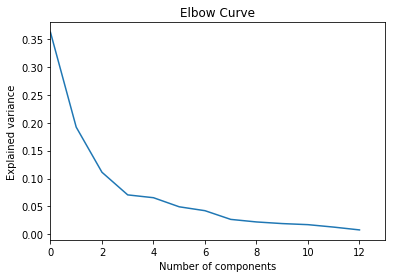

In [26]:
plt.plot(pca13.explained_variance_ratio_)
plt.xlim(0,13,1)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Elbow Curve')

Text(0,0.5,'Cumulative explained variance')

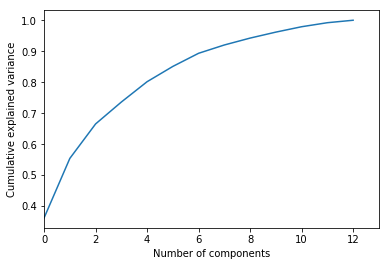

In [27]:
plt.plot(np.cumsum(pca13.explained_variance_ratio_))
plt.xlim(0,13,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

---
## Logistic Regression Analysis:

### Basic Logistic Regression withut PCA:

In [28]:
from sklearn.model_selection import train_test_split
# Split your data into training and testing (80% / 20%)
x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    random_state=42,
    test_size=0.20, shuffle=True
)

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_predict = log_reg.predict(x_test)
y_predict

/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['Barolo', 'Barolo', 'Barbera', 'Barolo', 'Grignolino', 'Barolo',
       'Grignolino', 'Barbera', 'Grignolino', 'Barbera', 'Grignolino',
       'Barbera', 'Barolo', 'Grignolino', 'Barolo', 'Grignolino',
       'Grignolino', 'Grignolino', 'Barolo', 'Grignolino', 'Barolo',
       'Grignolino', 'Grignolino', 'Barbera', 'Barbera', 'Barbera',
       'Grignolino', 'Grignolino', 'Grignolino', 'Barolo', 'Barolo',
       'Grignolino', 'Barbera', 'Barolo', 'Barolo', 'Barolo'],
      dtype=object)

In [30]:
y_predict_proba = log_reg.predict_proba(x_test)[:, 1]

In [31]:
log_reg.score(x_test, y_test)

0.9722222222222222

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Classification report:\n\n', classification_report(y_test, y_predict))
print('Training set score: {:.2f}%'.format(log_reg.score(x_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(log_reg.score(x_test, y_test) * 100))

Accuracy: 97.22%
Classification report:

               precision    recall  f1-score   support

     Barbera       1.00      1.00      1.00         8
      Barolo       1.00      0.93      0.96        14
  Grignolino       0.93      1.00      0.97        14

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Training set score: 96.48%
Testing set score: 97.22%


## Logistic Regression using PCA:

### Using n_components = 8

In [33]:
# Split your data into training and testing (80% / 20%)
x_train, x_test, y_train, y_test = train_test_split(
    features_pca8,
    target,
    random_state=42,
    test_size=0.20, shuffle=True
)

In [34]:
pca8 = LogisticRegression()
pca8.fit(x_train, y_train)
y_predict = pca8.predict(x_test)
y_predict

/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['Barolo', 'Barolo', 'Barbera', 'Barolo', 'Grignolino', 'Barolo',
       'Grignolino', 'Barbera', 'Grignolino', 'Barbera', 'Barolo',
       'Barbera', 'Barolo', 'Grignolino', 'Barolo', 'Grignolino',
       'Grignolino', 'Grignolino', 'Barolo', 'Grignolino', 'Barolo',
       'Grignolino', 'Grignolino', 'Barbera', 'Barbera', 'Barbera',
       'Grignolino', 'Grignolino', 'Grignolino', 'Barolo', 'Barolo',
       'Grignolino', 'Barbera', 'Barolo', 'Barolo', 'Barolo'],
      dtype=object)

In [35]:
y_predict_proba = pca8.predict_proba(x_test)[:, 1]

In [36]:
pca8.score(x_test, y_test)

1.0

In [37]:
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Classification report:\n\n', classification_report(y_test, y_predict))
print('Training set score: {:.2f}%'.format(pca8.score(x_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(pca8.score(x_test, y_test) * 100))

Accuracy: 100.00%
Classification report:

               precision    recall  f1-score   support

     Barbera       1.00      1.00      1.00         8
      Barolo       1.00      1.00      1.00        14
  Grignolino       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Training set score: 98.59%
Testing set score: 100.00%


### Using n_components=5

In [38]:
# Split your data into training and testing (80% / 20%)
x_train, x_test, y_train, y_test = train_test_split(
    features_pca5,
    target,
    random_state=42,
    test_size=0.20, shuffle=True
)

In [39]:
pca5 = LogisticRegression()
pca5.fit(x_train, y_train)
y_predict = pca5.predict(x_test)
y_predict

/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['Barolo', 'Barolo', 'Barbera', 'Barolo', 'Grignolino', 'Barolo',
       'Grignolino', 'Barbera', 'Grignolino', 'Barbera', 'Barolo',
       'Barbera', 'Barolo', 'Grignolino', 'Barolo', 'Grignolino',
       'Grignolino', 'Grignolino', 'Barolo', 'Grignolino', 'Barolo',
       'Grignolino', 'Grignolino', 'Barbera', 'Barbera', 'Barbera',
       'Grignolino', 'Grignolino', 'Grignolino', 'Barolo', 'Barolo',
       'Grignolino', 'Barbera', 'Barolo', 'Barolo', 'Barolo'],
      dtype=object)

In [40]:
y_predict_proba = pca5.predict_proba(x_test)[:, 1]

In [41]:
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Classification report:\n\n', classification_report(y_test, y_predict))
print('Training set score: {:.2f}%'.format(pca5.score(x_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(pca5.score(x_test, y_test) * 100))

Accuracy: 100.00%
Classification report:

               precision    recall  f1-score   support

     Barbera       1.00      1.00      1.00         8
      Barolo       1.00      1.00      1.00        14
  Grignolino       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Training set score: 98.59%
Testing set score: 100.00%


---
### Final Inferences:

***The Logistic Regression module without PCA has a classification accuracy of 97% and average F1-score of 97%.***

***The The Logistic Regression module with PCA has a classification accuracy of 100% and average F1-score of 100%.***

---